In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [ ]:
pip install natsort

In [2]:
DIR=r"C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images"

In [3]:
train=pd.read_csv(r"C:\Users\shaik\Desktop\Foliar diseases in apple\Datasets\train.csv")
test=pd.read_csv(r"C:\Users\shaik\Desktop\Foliar diseases in apple\Datasets\test.csv")

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


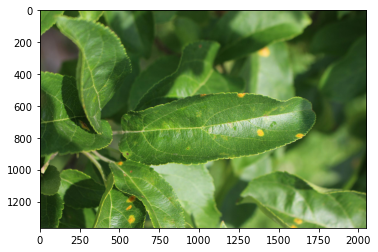

In [6]:
image1=Image.open(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\Test_0.jpg')
plt.imshow(image1)
plt.show()

# Prepare the Training Data

In [7]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [8]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [9]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [10]:
DIR

'C:\\Users\\shaik\\Desktop\\Foliar Diseases in Apple\\Datasets\\images'

In [11]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [12]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [13]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\scab')
                
        elif search("Test",img):
            shutil.copy(path,r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\test')
                

In [16]:
shutil.os.mkdir(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train')
shutil.os.mkdir(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\healthy')
shutil.os.mkdir(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\multiple_disease')
shutil.os.mkdir(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\rust')
shutil.os.mkdir(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train\scab')

shutil.os.mkdir(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\test')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\shaik\\Desktop\\Foliar Diseases in Apple\\Datasets\\images\\train'

In [17]:
train_dir=create_train_data()

100%|██████████████████████████████████████████████████████████████████████████████| 3643/3643 [00:58<00:00, 62.47it/s]


# Data Preprocessing

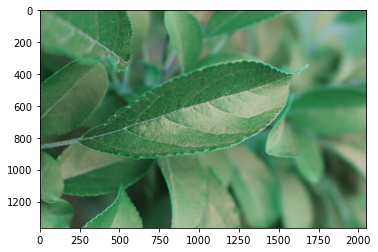

In [18]:
Train_DIR=r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

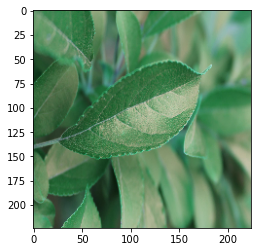

In [19]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Preparation

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [21]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\Datasets\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [22]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))



In [23]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [24]:
checkpoint=ModelCheckpoint(r'C:\Users\shaik\Desktop\Foliar Diseases in Apple\models\apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [25]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\shaik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
91/91 [==============================] - 188s 2s/step - loss: 1.2754 - accuracy: 0.3107 - val_loss: 1.2435 - val_accuracy: 0.3239

Epoch 00001: val_loss improved from inf to 1.24347, saving model to C:\Users\shaik\Desktop\Foliar Diseases in Apple\models\apple2.h5
Epoch 2/30
91/91 [==============================] - 199s 2s/step - loss: 1.2413 - accuracy: 0.3370 - val_loss: 1.2274 - val_accuracy: 0.3608

Epoch 00002: val_loss improved from 1.24347 to 1.22744, saving model to C:\Users\shaik\Desktop\Foliar Diseases in Apple\models\apple2.h5
Epoch 3/30
91/91 [==============================] - 209s 2s/step - loss: 1.1861 - accuracy: 0.4417 - val_loss: 1.0425 - val_accuracy: 0.5739

Epoch 00003: val_loss improved from 1.22744 to 1.04251, saving model to C:\Users\shaik\Desktop\Foliar Diseases in Apple\models\apple2.h5
Epoch 4/30
91/91 [==============================] - 189s 2s/step - loss: 0.9872 - accuracy: 0.5520 - val_loss: 0.8662 - val_accuracy: 0.5767

Epoch 00004: val_loss imp

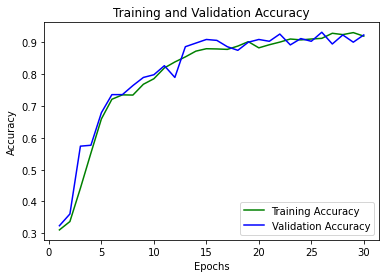

In [26]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

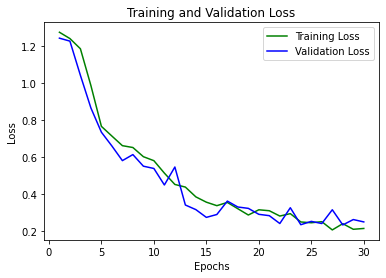

In [27]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the Prediction on a Single Image

2


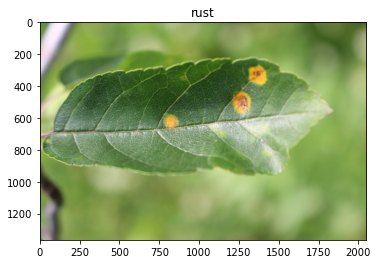

In [28]:
test_image=r'images\train\rust\Train_3.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()